Tugas Analisis Data Kependidikan

Nama  : Melda Safitri

NIM   : 20337028

Data yang digunakan pada pratikum ini adalah dataset yang berisi informasi tentang kinerja siswa sekolah menengah atas bidang matematika, termasuk nilai dan informasi demografis mereka. Data dikumpulkan dari tiga sekolah menengah atas di Amerika Serikat.

Variabel :
*   Gender : Jenis kelamin siswa. Kategorinya yaitu female (perempuan) dan male (laki-laki)
*   Parental level of education : Tingkat pendidikan tertinggi yang dicapai oleh orang tua atau wali siswa. Kategorinya yaitu some college (perguruan tinggi), associate's degree (gelar associate), high school (sekolah menengah atas), some high school (beberapa sekolah menengah atas), bachelor's degree (gelar sarjana), dan master's degree (gelar master)
*   Lunch : Apakah siswa menerima makan siang gratis atau dengan potongan harga. Kategorinya yaitu standard (tidak menerima makan siang gratis ata potongan harga makan siang) dan free/reduced (menerima makan siang sekolah gratis atau makan siang sekolah dengan potongan harga)
*   Test preparation course : Apakah siswa telah menyelesaikan kursus persiapan ujian. Kategorinya yaitu none (belum) dan complited (sudah)
*   Math score : Nilai siswa pada tes matematika standar
*   Reading score : Nilai siswa pada tes membaca standar
*   Writing score : Nilai siswa pada tes menulis standar

Sumber data : https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics

info tambahan
https://www.kaggle.com/code/getanmolgupta01/eda-student-performance











Import Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading dataset
data = pd.read_csv("/content/exams.csv")

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [ ]:
df = data.drop(['race/ethnicity'], axis=1)

In [ ]:
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,some college,standard,completed,59,70,78
1,male,associate's degree,standard,none,96,93,87
2,female,some college,free/reduced,none,57,76,77
3,male,some college,free/reduced,none,70,70,63
4,female,associate's degree,standard,none,83,85,86


Pada dataset Student Performance Prediction ini terdapat satu variabel yang memiliki kategorinya yang tidak jelas, variabenya adalah race, yang mana datanya tidak ada keterangan untuk masing-masing kategorinya. Sehingga variabel race dihapus. Maka pada pratikum ini akan digunakan 7 variabel.

In [ ]:
df.shape

(1000, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   parental level of education  1000 non-null   object
 2   lunch                        1000 non-null   object
 3   test preparation course      1000 non-null   object
 4   math score                   1000 non-null   int64 
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


Dari fungsi df.info() dapat diketahui tipe data dari maisng-masing variabel, dimana terdapat 4 variabel yang bertipe data kategorik dan 3 variabel lainnya bertipe data numerik.

In [ ]:
#cek missing value
df.isnull().sum()

gender                         0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Dari dataset Student Performance Prediction dapat diketahui bahwa tidak terdapat missing value.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,67.810,15.250196,15.0,58.0,68.0,79.25,100.0
reading score,1000.0,70.382,14.107413,25.0,61.0,70.5,80.00,100.0
writing score,1000.0,69.140,15.025917,15.0,59.0,70.0,80.00,100.0


Untuk melihat summary dari data pada variabel numerik dapat menggunakan fungsi describe() seperti pada codingan di atas. Diperoleh informasi bahwa setiap test memiliki hasil test tertinggi yaitu 100. Dari summary di atas, diperoleh juga informasi bahwa rata-rata dari test mendengarkan lebih tinggi dibandingkan dengan test lainnya.

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
gender,1000,2,male,508
parental level of education,1000,6,some college,224
lunch,1000,2,standard,660
test preparation course,1000,2,none,656


Dari informasi di atas, dapat diketahui kategori terbanyka dari masing-masing variabel.

Selnajutnya, akan dilakukan visaulisasi untuk masing-masing variabel.

1. Variabel Gender

In [ ]:
df.gender.value_counts()

male      508
female    492
Name: gender, dtype: int64

Diperoleh informasi pada dataset Student Performance Prediction bahwa  jumlah siswa laki-laki lebih banyak dibandingkan jumlah sisawa perempuan. Untuk lebih jelasnya, akan divisualisasikan dengan menggunakan bar chart dan pie chart.

<Axes: >

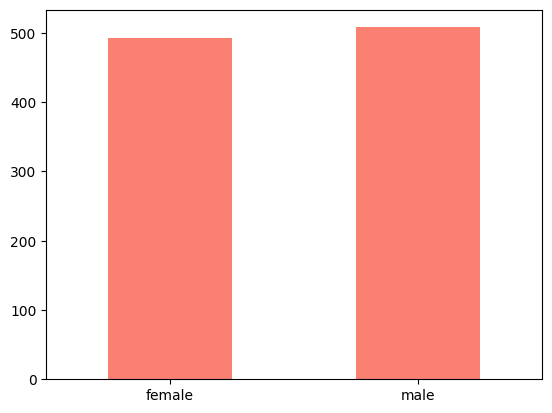

In [ ]:
#bar chart sederhana menggunakan pandas
df['gender'].value_counts().sort_index().plot.bar(color='salmon', rot=0)

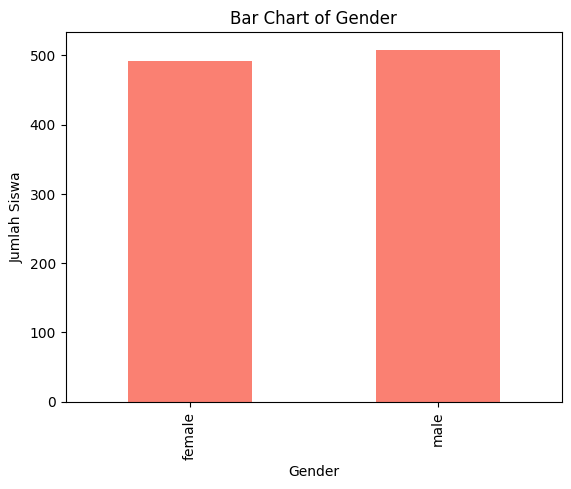

In [ ]:
#diagram balok sederhanan menggunakan matplotlib
gender = df.groupby('gender')[['gender']].value_counts()
gender.plot(kind='bar', color='salmon')
plt.xlabel('Gender')
plt.ylabel('Jumlah Siswa')
plt.title('Bar Chart of Gender')
plt.show()

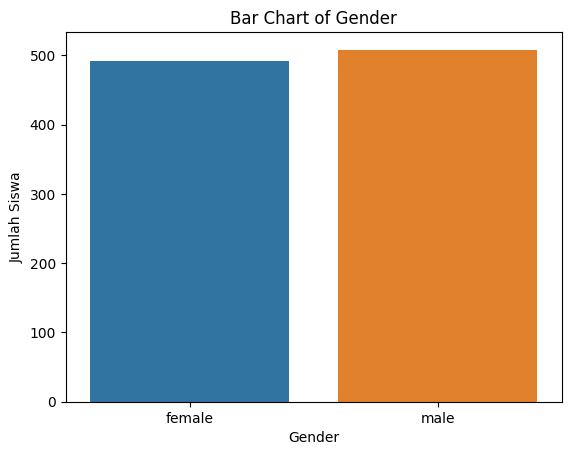

In [ ]:
#diagram balok sederhana menggunakan seaborn
sns.countplot(data=df,x=df['gender'])
plt.xlabel('Gender')
plt.ylabel('Jumlah Siswa')
plt.title('Bar Chart of Gender')
plt.show()

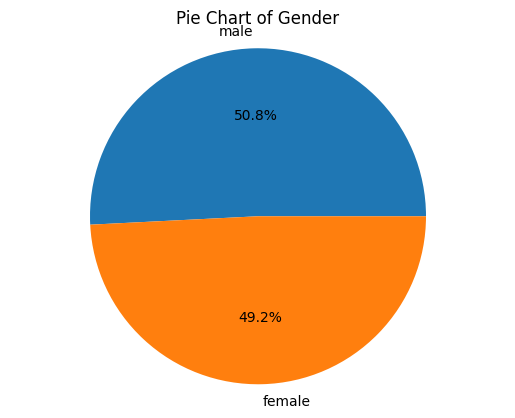

In [ ]:
#pie chart
gender1 = df['gender'].value_counts()

plt.pie(gender1, labels=gender1.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Pie Chart of Gender')
plt.show()

2. Parental Level of Education

In [ ]:
df['parental level of education'].value_counts()

some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: parental level of education, dtype: int64

<Axes: >

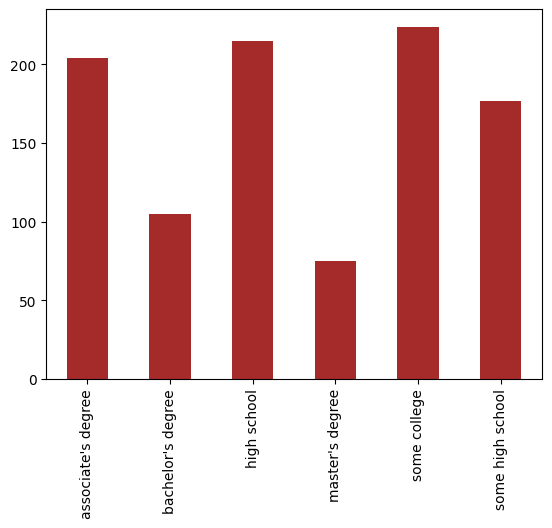

In [ ]:
#bar chart sederhana menggunakan pandas
df['parental level of education'].value_counts().sort_index().plot.bar(color='brown')

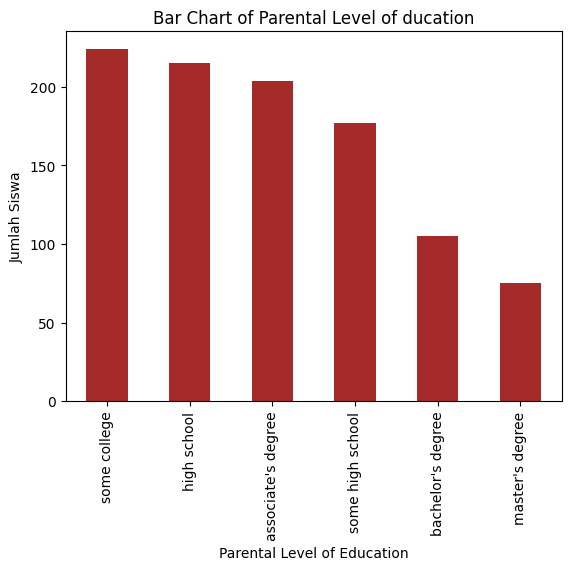

In [ ]:
#diagram balok sederhanan menggunakan matplotlib
ple = df['parental level of education'].value_counts()
ple.plot(kind='bar', color='brown')
plt.xlabel('Parental Level of Education')
plt.ylabel('Jumlah Siswa')
plt.title('Bar Chart of Parental Level of ducation')
plt.show()

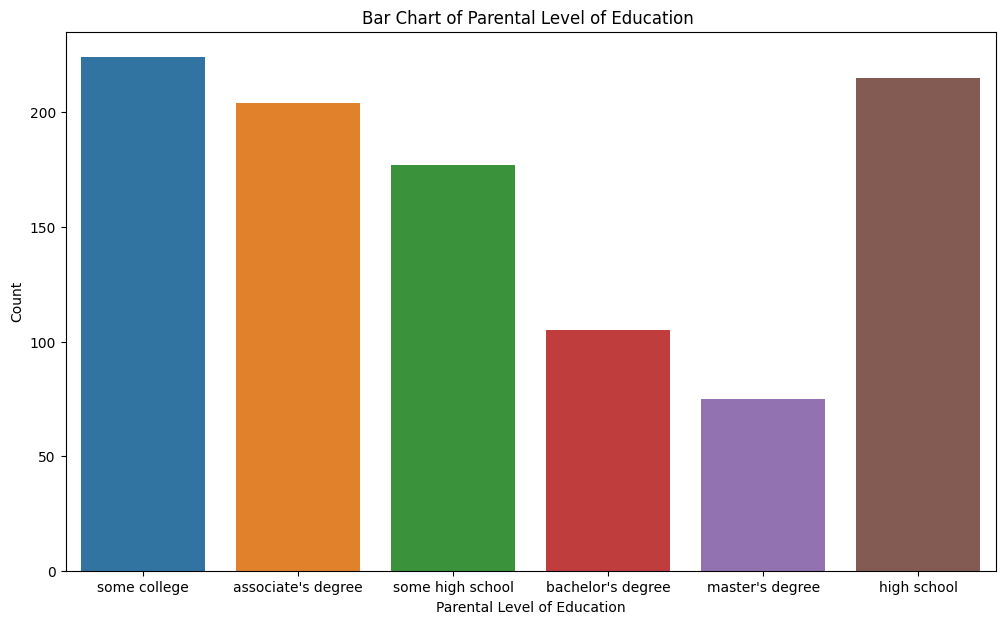

In [ ]:
#diagram balok sederhanan menggunakan pandas
plt.figure(figsize = (12,7))
sns.countplot(data=df,x=df['parental level of education'])
plt.xlabel('Parental Level of Education')
plt.ylabel('Count')
plt.title('Bar Chart of Parental Level of Education ')
plt.show()

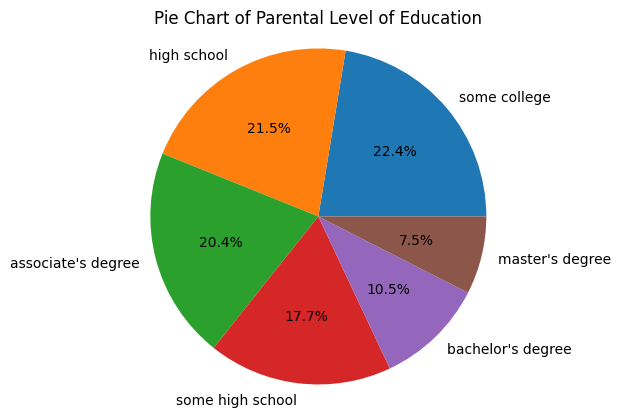

In [ ]:
#pie chart
ple= df['parental level of education'].value_counts()

plt.pie(ple, labels=ple.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Pie Chart of Parental Level of Education')
plt.show()

3. Lunch

In [ ]:
df['lunch'].value_counts()

standard        660
free/reduced    340
Name: lunch, dtype: int64

<Axes: >

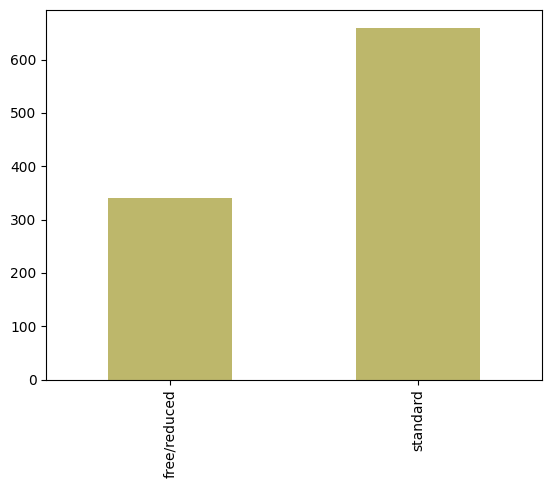

In [ ]:
#bar chart sederhana menggunakan pandas
df['lunch'].value_counts().sort_index().plot.bar(color='darkkhaki')

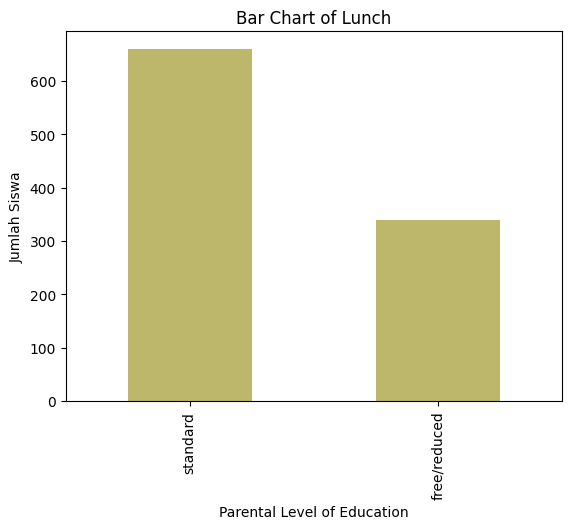

In [ ]:
#diagram balok sederhanan menggunakan matplotlib
lunch1 = df['lunch'].value_counts()
lunch1.plot(kind='bar', color='darkkhaki')
plt.xlabel('Parental Level of Education')
plt.ylabel('Jumlah Siswa')
plt.title('Bar Chart of Lunch')
plt.show()

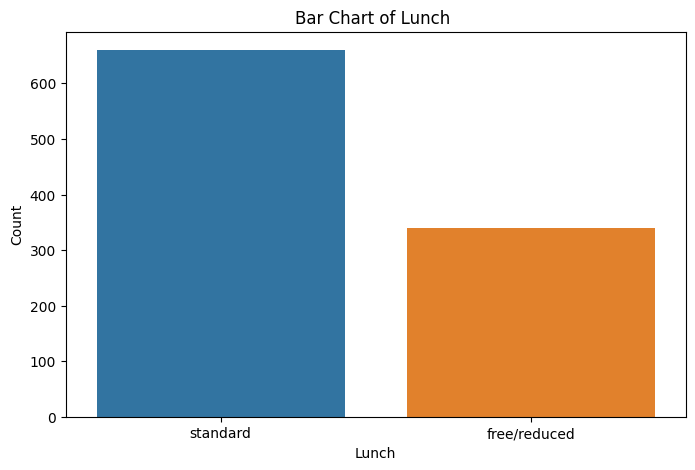

In [ ]:
#diagram balok sederhanan menggunakan pandas
plt.figure(figsize = (8,5))
#sns.set_theme(style="whitegrid", palette="pastel")
sns.countplot(data=df,x=df['lunch'])
plt.xlabel('Lunch')
plt.ylabel('Count')
plt.title('Bar Chart of Lunch ')
plt.show()

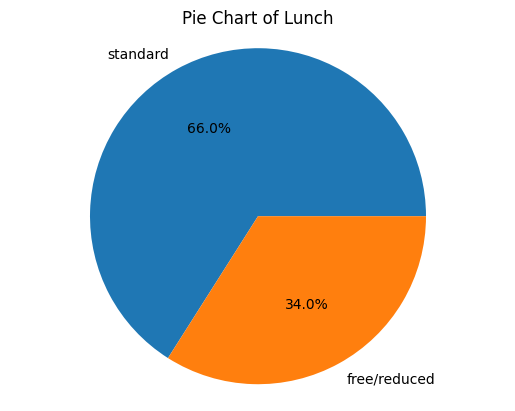

In [ ]:
#pie chart
lunch1 = df['lunch'].value_counts()

plt.pie(lunch1 , labels=lunch1.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Pie Chart of Lunch')
plt.show()

4. Test Preparation Course

In [ ]:
df['test preparation course'].value_counts()

none         656
completed    344
Name: test preparation course, dtype: int64

<Axes: >

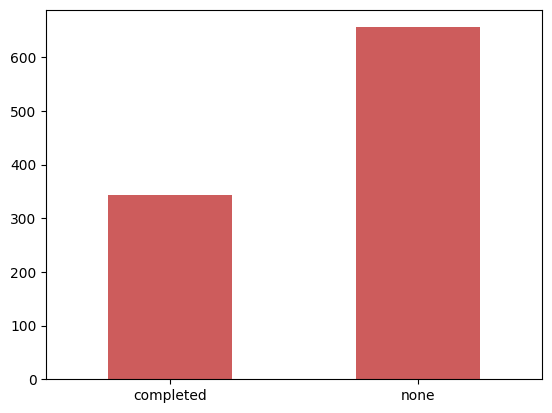

In [ ]:
#bar chart sederhana menggunakan pandas
df['test preparation course'].value_counts().sort_index().plot.bar(color='indianred', rot=0)

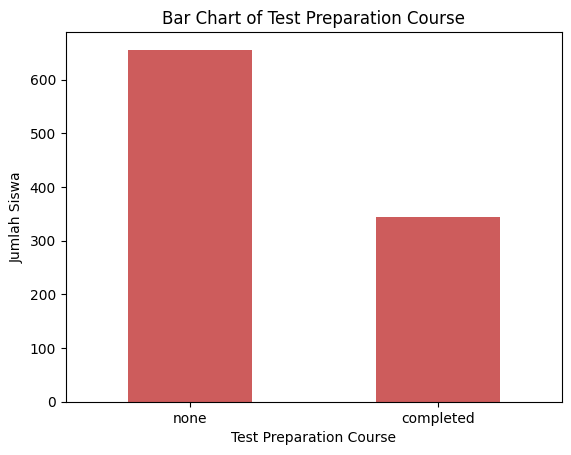

In [ ]:
#diagram balok sederhanan menggunakan matplotlib
tpc = df['test preparation course'].value_counts()
tpc.plot(kind='bar', color='indianred', rot=0)
plt.xlabel('Test Preparation Course')
plt.ylabel('Jumlah Siswa')
plt.title('Bar Chart of Test Preparation Course')
plt.show()

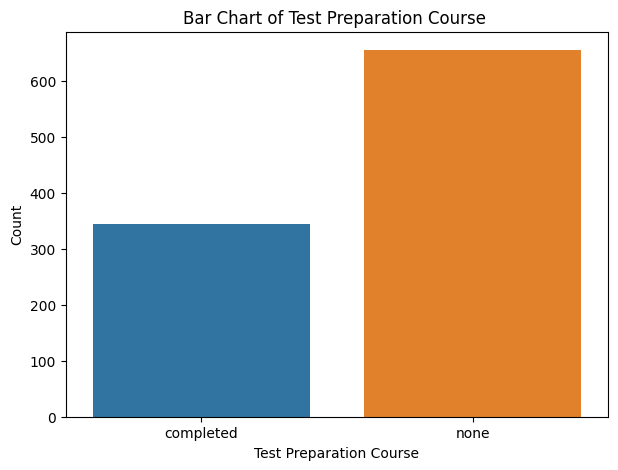

In [ ]:
#diagram balok sederhanan menggunakan pandas
plt.figure(figsize = (7,5))
#sns.set_theme(style='whitegrid', palette='Set2')
sns.countplot(data=df,x=df['test preparation course'])
plt.xlabel('Test Preparation Course')
plt.ylabel('Count')
plt.title('Bar Chart of Test Preparation Course ')
plt.show()

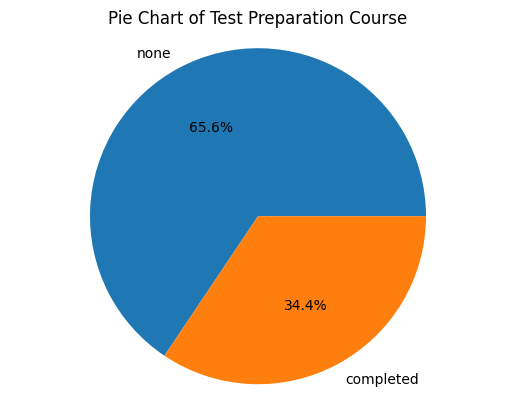

In [ ]:
#pie chart
tpc = df['test preparation course'].value_counts()
#sns.set_theme(style='whitegrid', palette='Set2')
plt.pie(tpc, labels=tpc.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Pie Chart of Test Preparation Course')
plt.show()

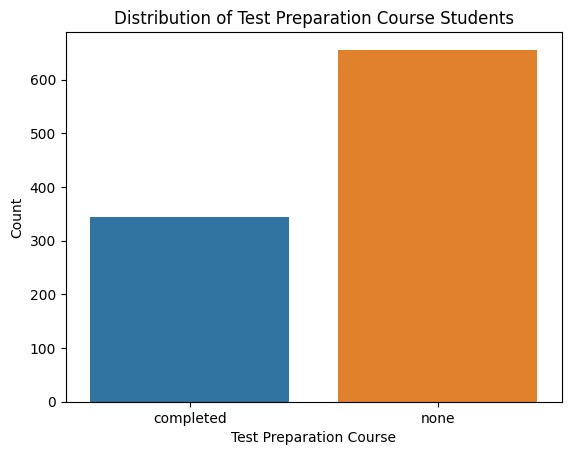

In [ ]:
sns.countplot(data=df,x=df['test preparation course'])
plt.xlabel('Test Preparation Course')
plt.ylabel('Count')
plt.title('Distribution of Test Preparation Course Students')
plt.show()

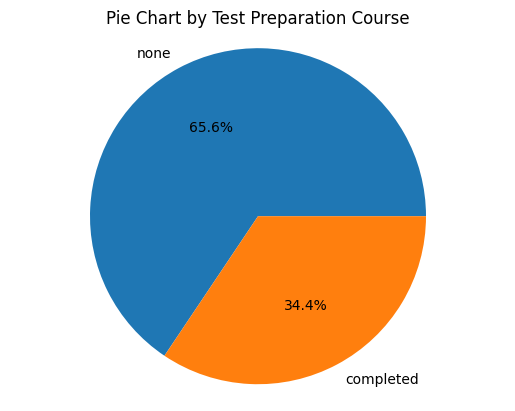

In [ ]:
tpc = df['test preparation course'].value_counts()

# Mnampilkan Pie Chart
plt.pie(tpc , labels=tpc.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Pie Chart by Test Preparation Course')
plt.show()

5. Math Score

<Axes: title={'center': 'Histogram of Math Scoore'}, ylabel='Frequency'>

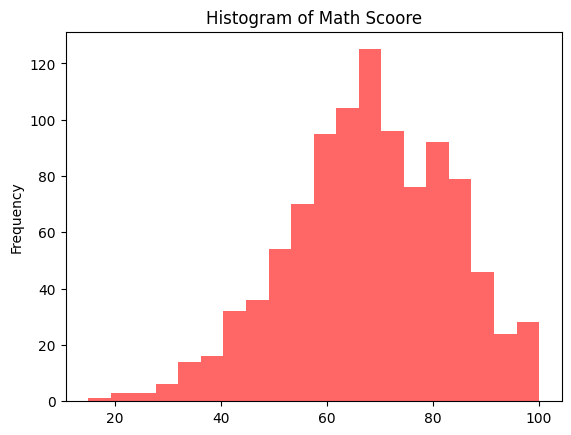

In [ ]:
df['math score'].plot.hist(title="Histogram of Math Scoore", color='red', alpha=0.6, bins=20)

<Axes: title={'center': 'Histogram of Math Scoore'}, ylabel='Frequency'>

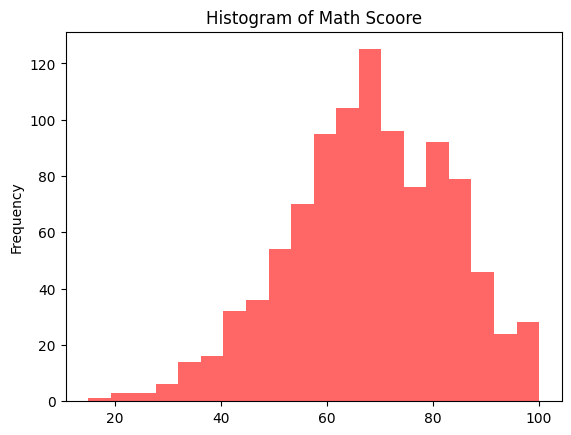

In [ ]:
#sns.set_theme(style='darkgrid', palette='dark')
df['math score'].plot.hist(title="Histogram of Math Scoore", color='red', alpha=0.6, bins=20)

<Axes: xlabel='math score', ylabel='Count'>

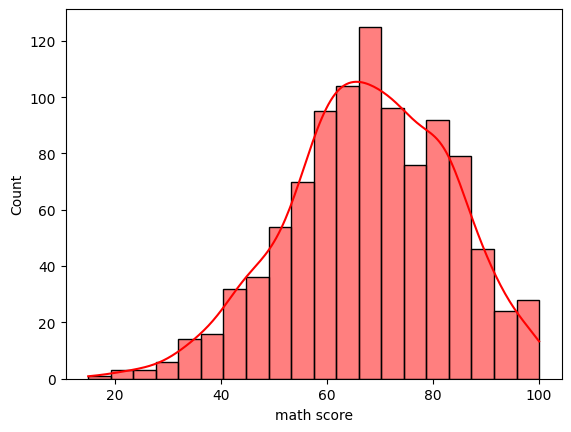

In [ ]:
# Density Plot and Histogram of Math score
#sns.set_theme(style='darkgrid')
sns.histplot(df['math score'], kde=True, color = 'red')

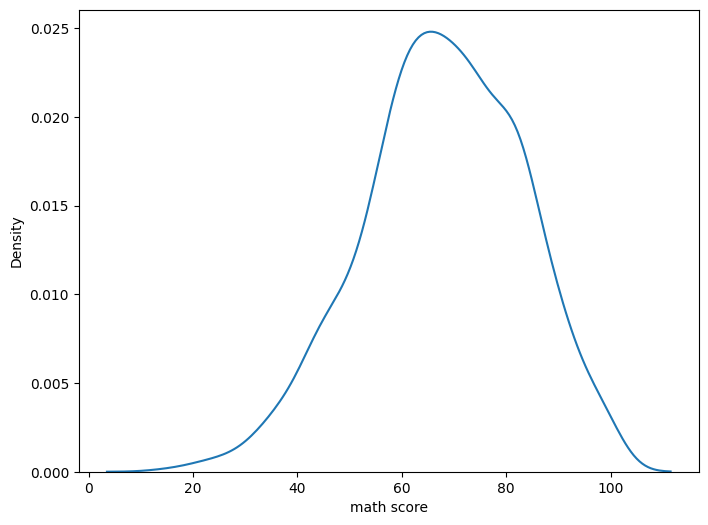

In [ ]:
plt.figure(figsize = (8,6))
sns.kdeplot(x = df['math score'])
plt.show()

math score    Axes(0.125,0.11;0.775x0.77)
dtype: object

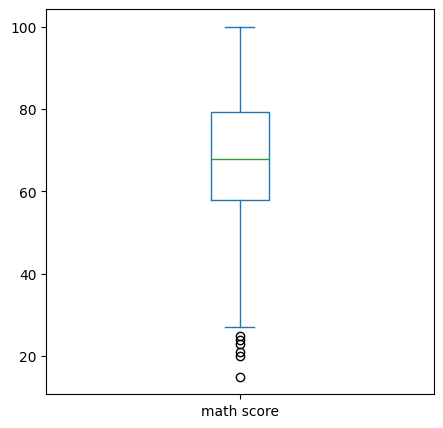

In [ ]:
#sns.set_theme(style='whitegrid', palette='dark')
df['math score'].plot.box(subplots=True, figsize=(5,5))

6. Reading Score

<Axes: title={'center': 'Histogram of Reading Score'}, ylabel='Frequency'>

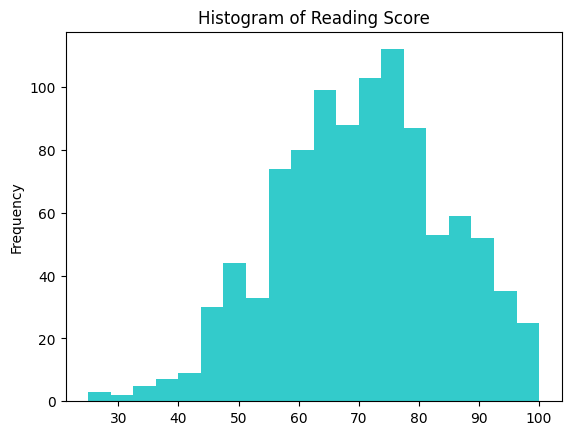

In [ ]:
#sns.set_theme(style='darkgrid')
df['reading score'].plot.hist(title="Histogram of Reading Score", color='c', alpha=0.8, bins=20)

<Axes: xlabel='reading score', ylabel='Count'>

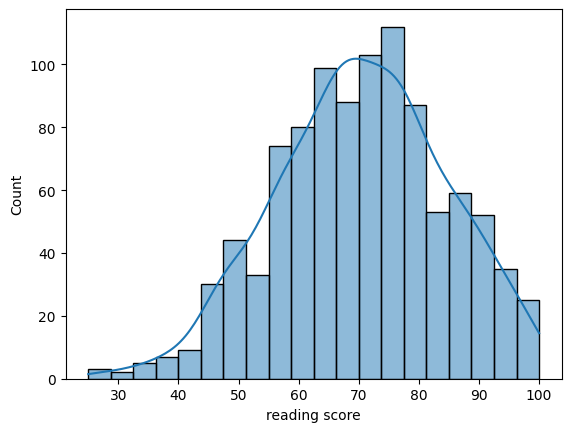

In [ ]:
# Density Plot and Histogram of Reading score
#sns.set_theme(style='darkgrid')
sns.histplot(df['reading score'], kde=True)

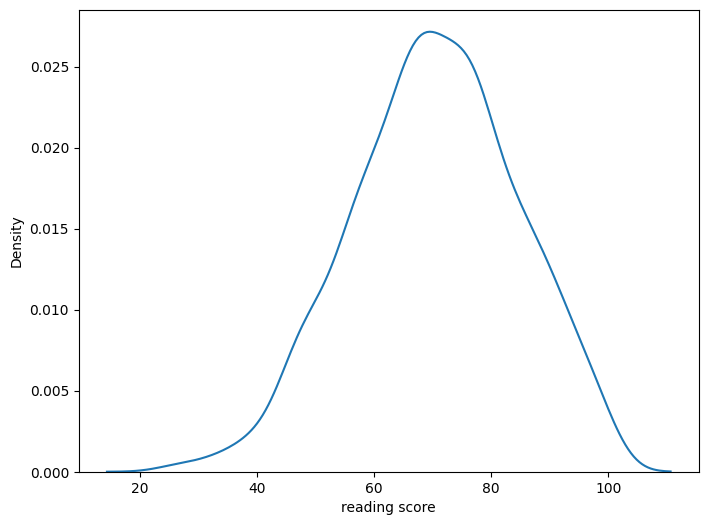

In [ ]:
plt.figure(figsize = (8,6))
sns.kdeplot(x = df['reading score'])
plt.show()

reading score    Axes(0.125,0.11;0.775x0.77)
dtype: object

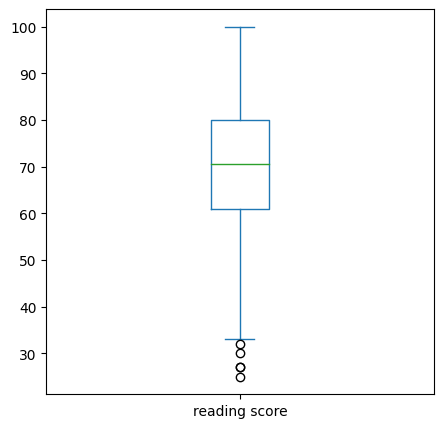

In [ ]:
#sns.set_theme(style='darkgrid')
df['reading score'].plot.box(subplots=True, figsize=(5,5))

7. Writing Score

<Axes: title={'center': 'Histogram of Writing Score'}, ylabel='Frequency'>

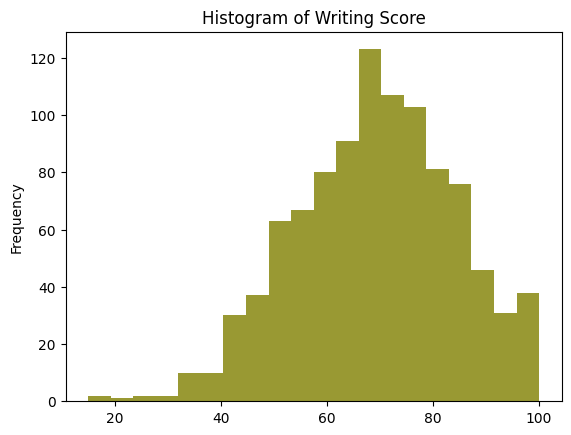

In [ ]:
#sns.set_theme(style='darkgrid')
df['writing score'].plot.hist(title="Histogram of Writing Score", color='olive', alpha=0.8, bins=20)

<Axes: xlabel='writing score', ylabel='Count'>

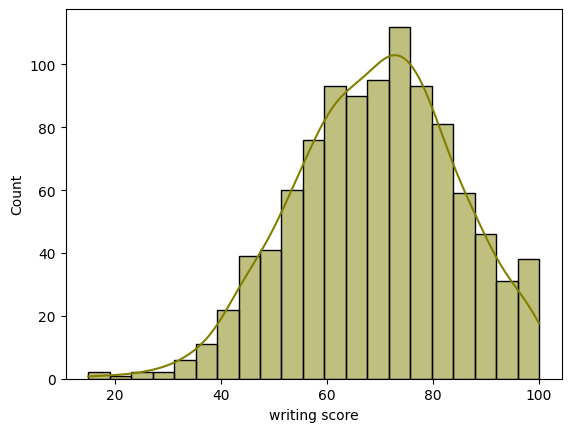

In [ ]:
# Density Plot and Histogram of writing score
#sns.set_theme(style='darkgrid')
sns.histplot(df['writing score'], kde=True, color = 'olive')

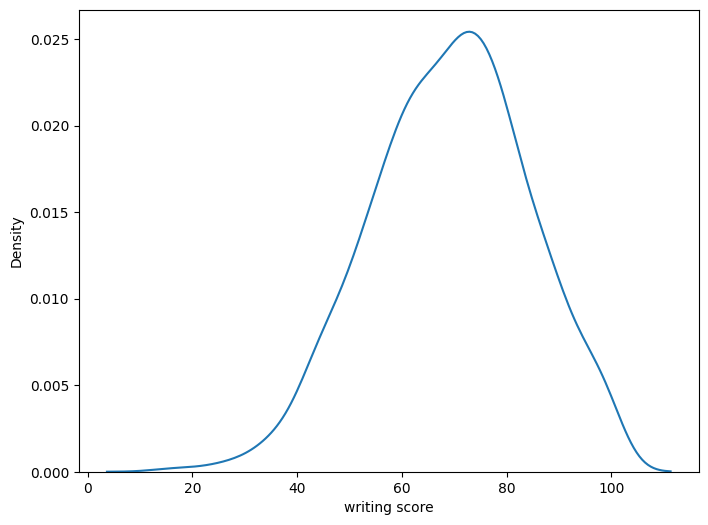

In [ ]:
plt.figure(figsize = (8,6))
sns.kdeplot(x = df['writing score'])
plt.show()

writing score    Axes(0.125,0.11;0.775x0.77)
dtype: object

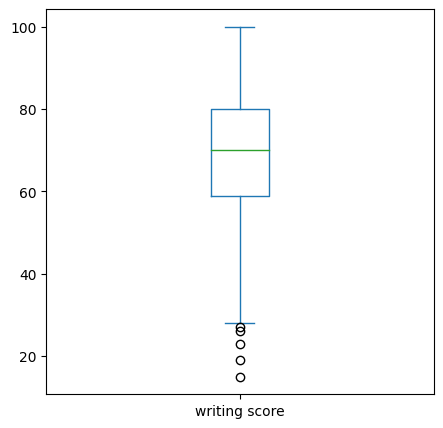

In [ ]:
df['writing score'].plot.box(subplots=True, figsize=(5,5))

<Axes: xlabel='writing score'>

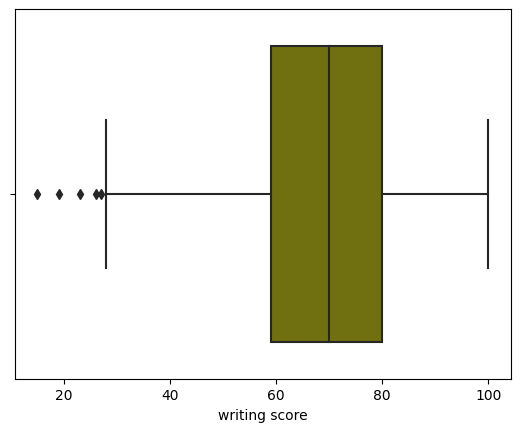

In [ ]:
#sns.set_theme(style='darkgrid')
sns.boxplot(x=df['writing score'], color = 'olive')

Hubungan antar variabel

Korelasi masing-masing variabel numerik

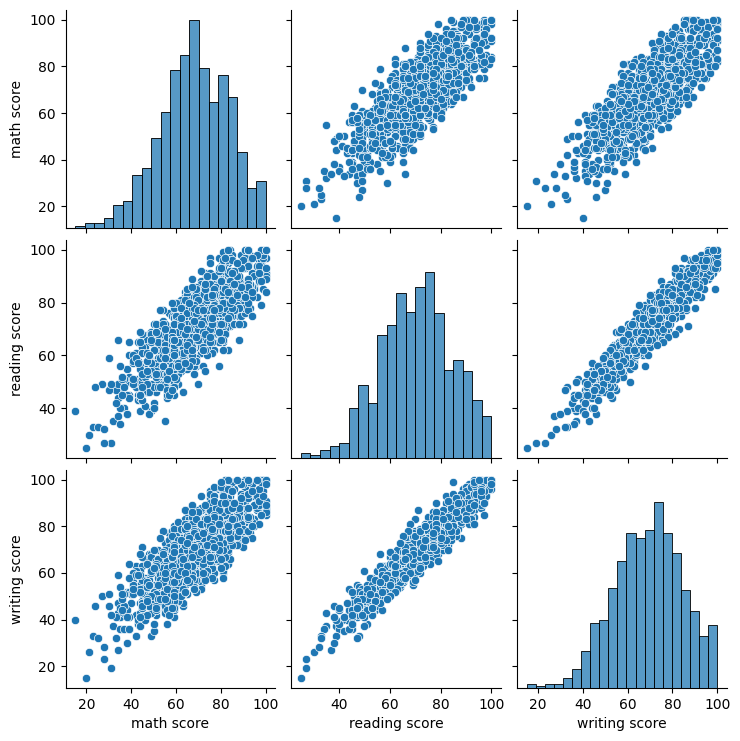

In [ ]:
sns.pairplot(df)

<ipython-input-48-579ad4ebf2c7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')


<Axes: >

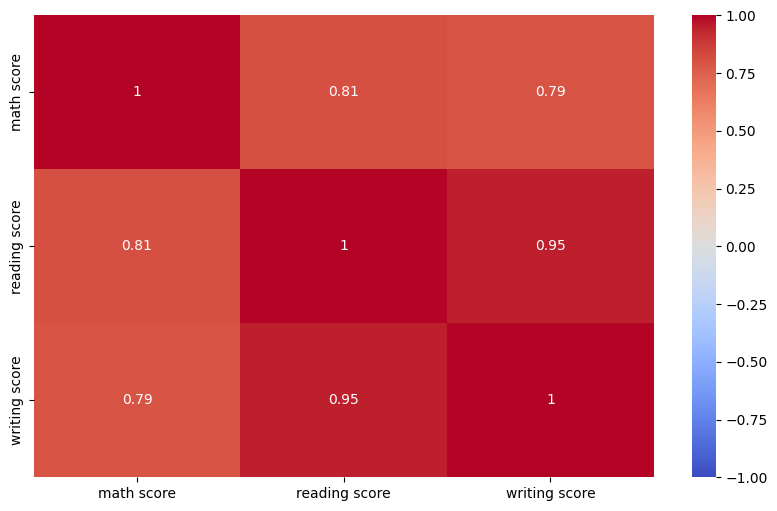

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm')

<ipython-input-49-699201837c09>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='coolwarm')


,math score,reading score,writing score
math score,1.000000,0.811767,0.790055
reading score,0.811767,1.000000,0.948909
writing score,0.790055,0.948909,1.000000


Korelasi dari variabel math score dan reading score

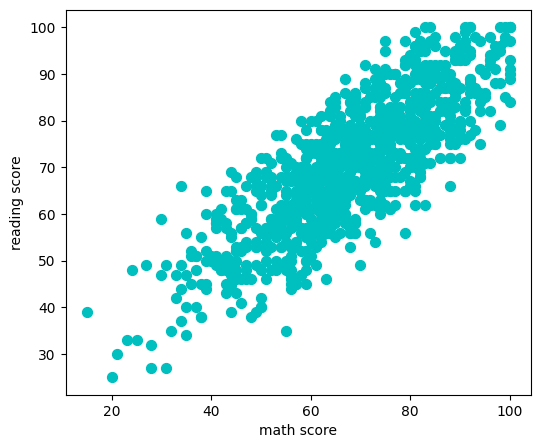

In [ ]:
sc_plot = df.plot.scatter(x='math score' , y='reading score', c='c', s=50, figsize=(6,5) )

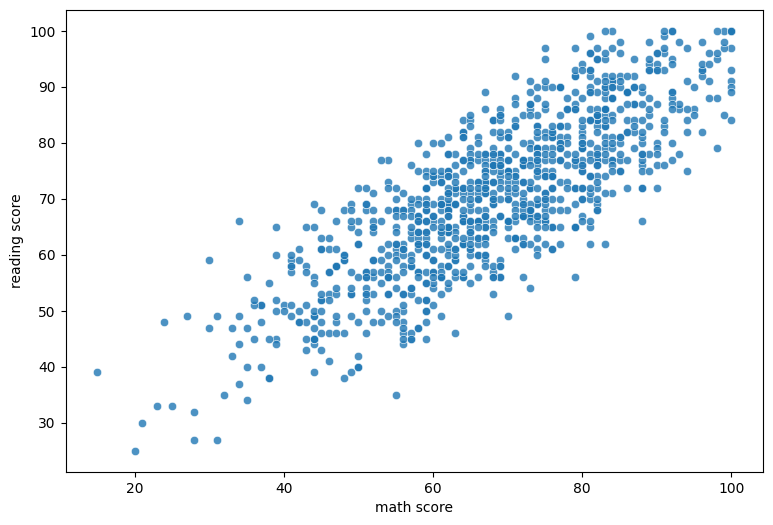

In [ ]:
plt.figure(figsize = (9,6))
sns.scatterplot(x ='math score', y='reading score', data=df, alpha=0.8)
plt.show()

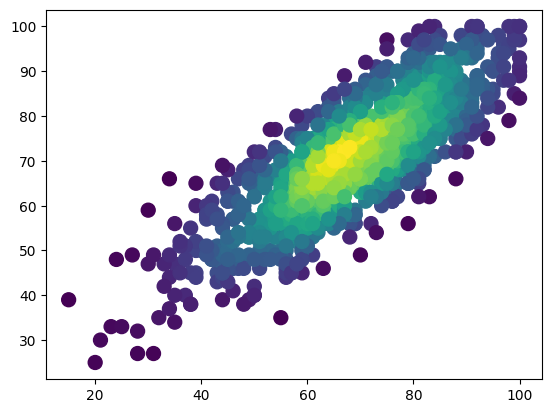

In [ ]:
## High density scatter plot
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate fake data
x = df['math score']
y = df['reading score']

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.show()

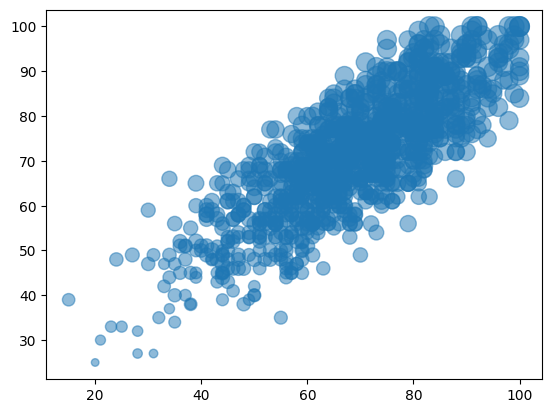

In [ ]:
## Bubble plot
import matplotlib.pyplot as plt
import numpy as np

x = df['math score']
y = df['reading score']
z = df['writing score']

# use the scatter function
plt.scatter(x, y, s=z*2, alpha=0.5)
plt.show()

Korelasi antara variabel math score dan variabel writing score

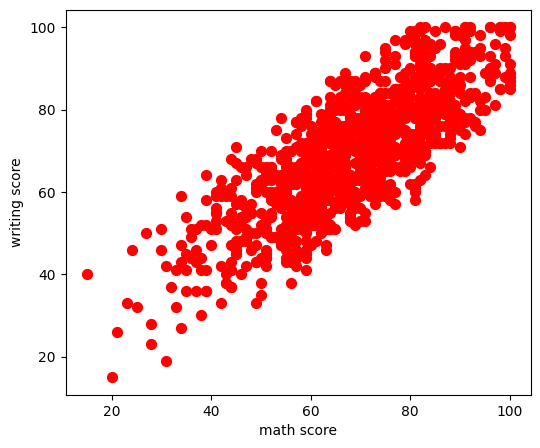

In [ ]:
sc_plot = df.plot.scatter(x='math score' , y='writing score', c='red', s=50, figsize=(6,5) )

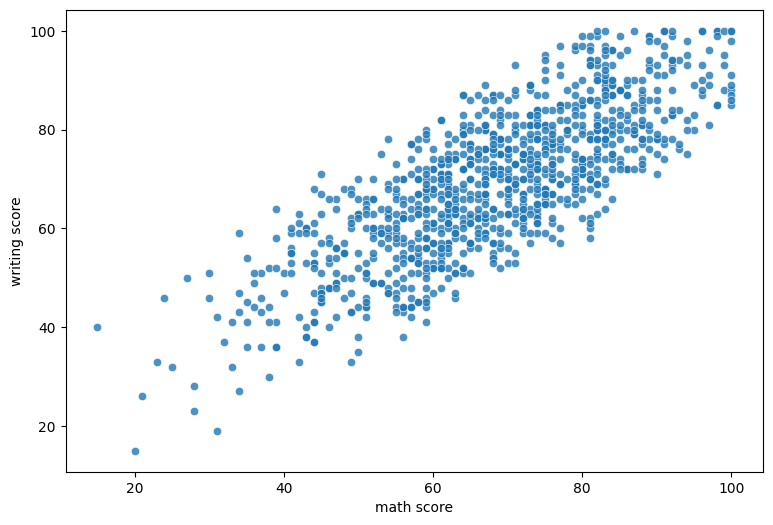

In [ ]:
plt.figure(figsize = (9,6))
sns.scatterplot(x ='math score', y='writing score', data=df, alpha=0.8)
plt.show()

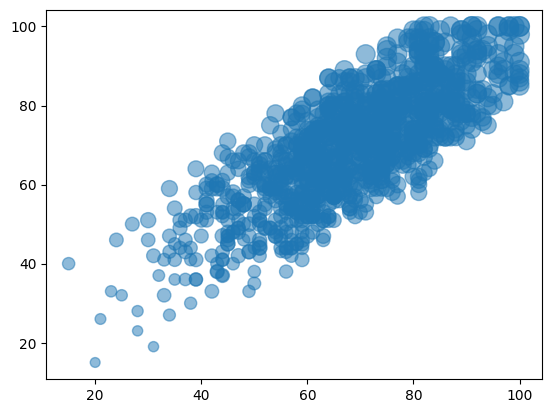

In [ ]:
## Bubble plot
import matplotlib.pyplot as plt
import numpy as np

x = df['math score']
y = df['writing score']
z = df['reading score']

# use the scatter function
plt.scatter(x, y, s=z*2, alpha=0.5)

# show the graph
plt.show()

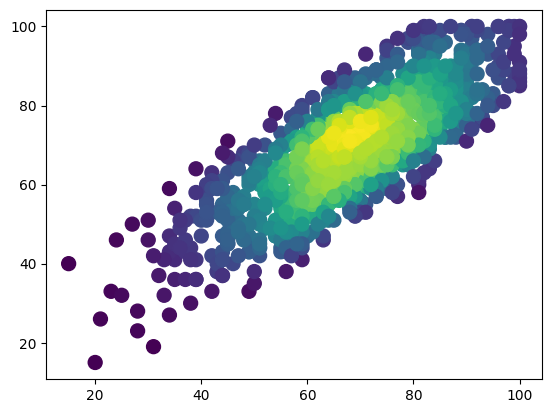

In [ ]:
## High density scatter plot
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate fake data
x = df['math score']
y = df['writing score']

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.show()

Korelasi antara variabel reading score dan writing score

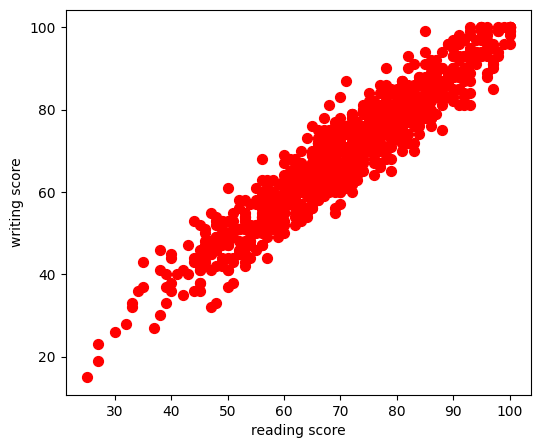

In [ ]:
sc_plot = df.plot.scatter(x='reading score' , y='writing score', c='red', s=50, figsize=(6,5) )

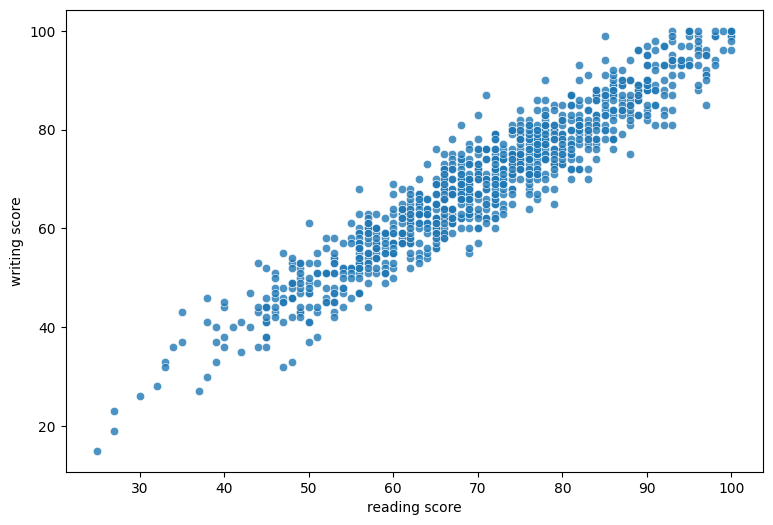

In [ ]:
plt.figure(figsize = (9,6))
sns.scatterplot(x ='reading score', y='writing score', data=df, alpha=0.8)
plt.show()

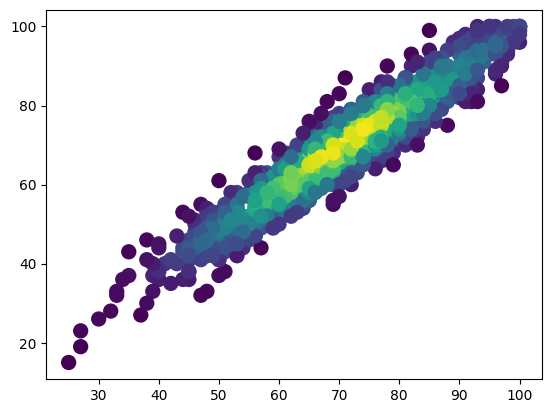

In [ ]:
## High density scatter plot
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate fake data
x = df['reading score']
y = df['writing score']

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.show()

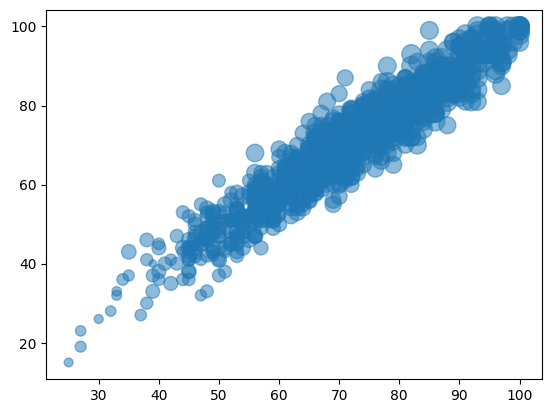

In [ ]:
## Bubble plot
import matplotlib.pyplot as plt
import numpy as np

x = df['reading score']
y = df['writing score']
z = df['math score']

# use the scatter function
plt.scatter(x, y, s=z*2, alpha=0.5)

# show the graph
plt.show()

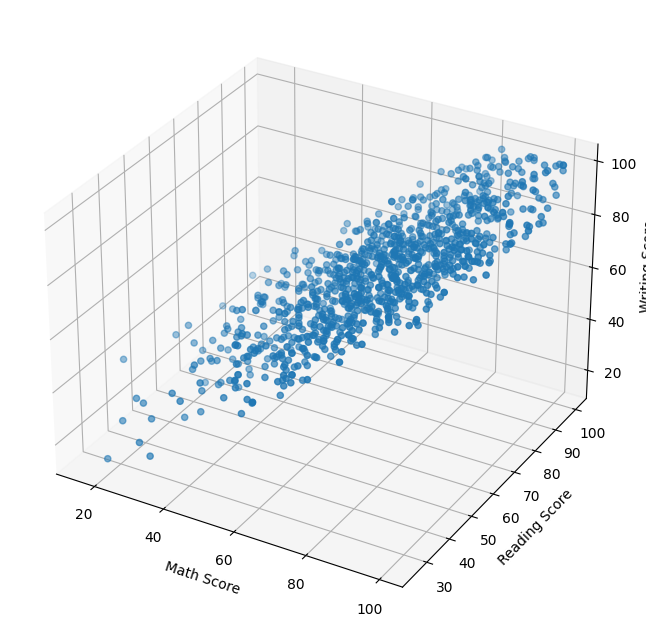

In [ ]:
#3D scatterplot
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(df['math score'], df['reading score'], df['writing score'])
ax.set_xlabel("Math Score")
ax.set_ylabel("Reading Score")
ax.set_zlabel("Writing Score")
plt.show()

1. Variabel Gender dan Parental Level of Education

In [ ]:
df.groupby('parental level of education')['gender'].value_counts()

parental level of education  gender
associate's degree           male      103
                             female    101
bachelor's degree            male       53
                             female     52
high school                  female    116
                             male       99
master's degree              male       42
                             female     33
some college                 male      118
                             female    106
some high school             male       93
                             female     84
Name: gender, dtype: int64

In [ ]:

data_crosstab = pd.crosstab(df['parental level of education'], df['gender'],  margins = True)
data_crosstab

gender,female,male,All
parental level of education,,,
associate's degree,101,103,204
bachelor's degree,52,53,105
high school,116,99,215
master's degree,33,42,75
some college,106,118,224
some high school,84,93,177
All,492,508,1000


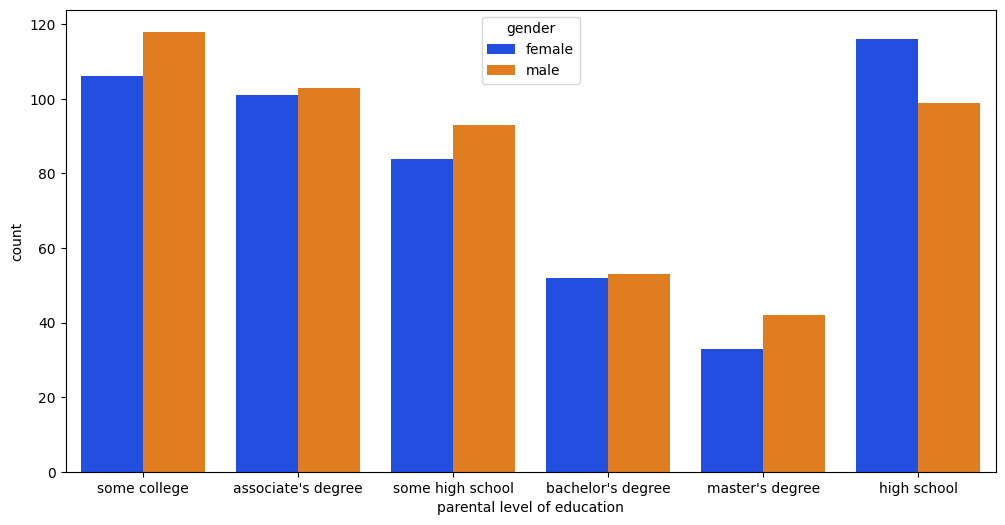

In [ ]:
#grup bar
plt.figure(figsize = (12,6))
groupbar = sns.countplot(x='parental level of education', data = df, hue='gender', palette='bright')
groupbar1 = plt.setp(groupbar.get_xticklabels(), rotation=0)

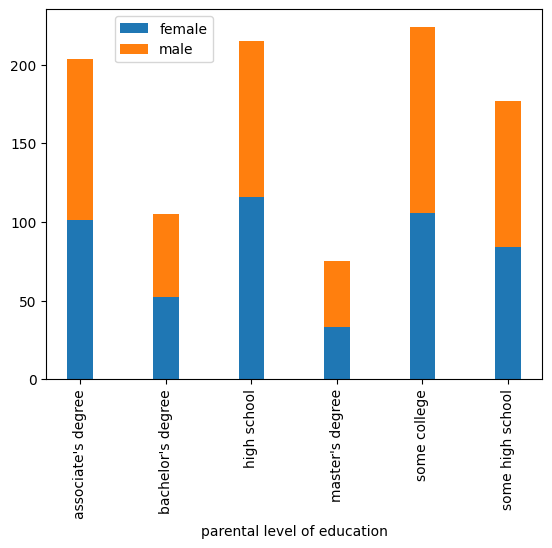

In [ ]:
#staked plot
df1 = (df.groupby("parental level of education")["gender"].value_counts().unstack())
df1.plot.bar(stacked=True, width=0.3)
plt.legend(bbox_to_anchor=(0.35,1))

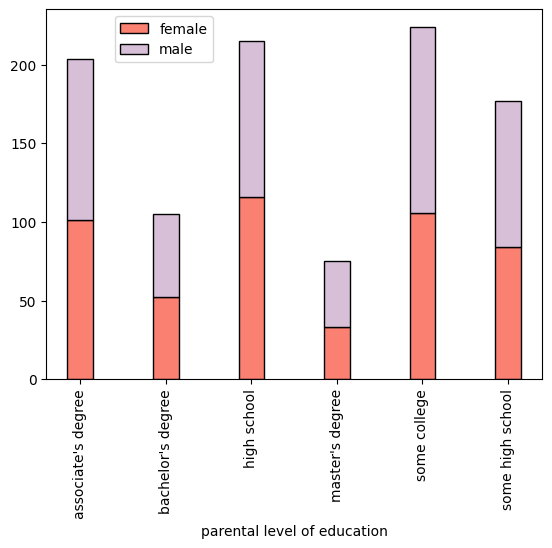

In [ ]:
#staked plot
df1 = (df.groupby("parental level of education")["gender"].value_counts().unstack())
color = ['salmon','thistle']
df1.plot.bar(stacked = True, width = 0.3, edgecolor = "black",color=color)
plt.legend(bbox_to_anchor=(0.35,1))

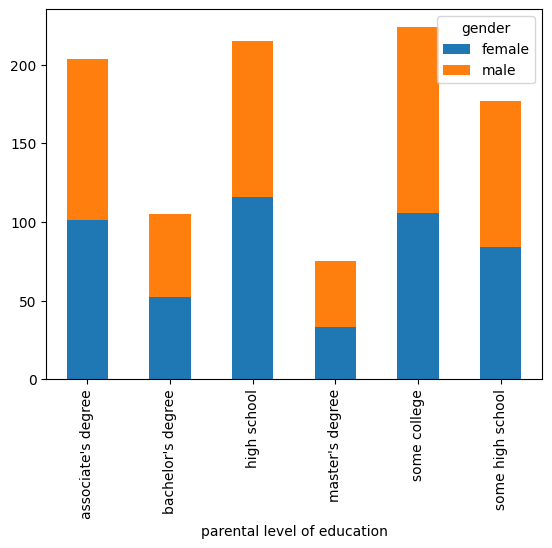

In [ ]:
ax = df1.plot.bar(stacked=True)

<Axes: ylabel='gender'>

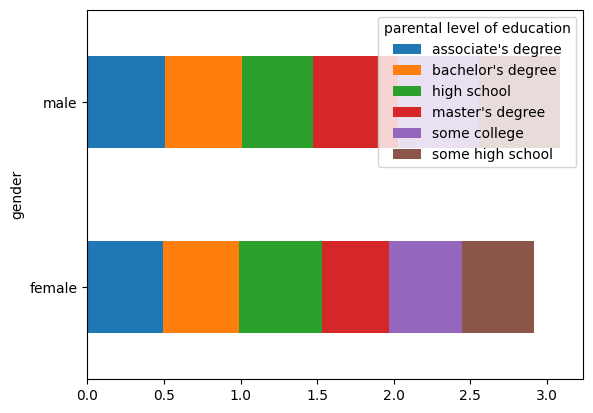

In [ ]:
#spinogram
gender_group = df.groupby(['gender', 'parental level of education',]).size().unstack()

gender_group.apply(lambda x:x/x.sum()).plot(kind='barh', stacked=True)

<Figure size 1500x2000 with 0 Axes>

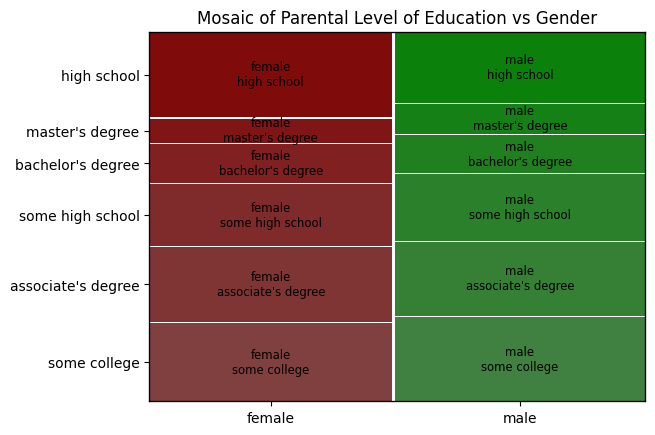

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

plt.figure(figsize = (15,20))
mosaic(df, ['gender','parental level of education'], title='Mosaic of Parental Level of Education vs Gender')
plt.show()

2. Variabel Gender dan Test Preparation Course

In [ ]:
df.groupby('test preparation course')['gender'].value_counts()

test preparation course  gender
completed                female    177
                         male      167
none                     male      341
                         female    315
Name: gender, dtype: int64

In [ ]:

data_crosstab = pd.crosstab(df['gender'], df['test preparation course'],  margins = False)
data_crosstab

test preparation course,completed,none
gender,,
female,177,315
male,167,341


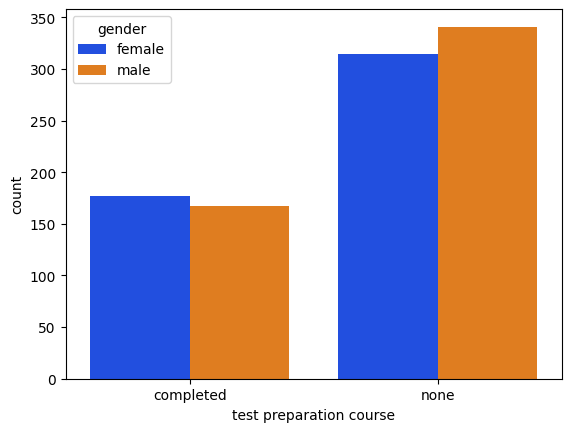

In [ ]:
groupbar = sns.countplot(x='test preparation course', data = df, hue='gender', palette='bright')
groupbar1 = plt.setp(groupbar.get_xticklabels(), rotation=0)

<Axes: xlabel='test preparation course'>

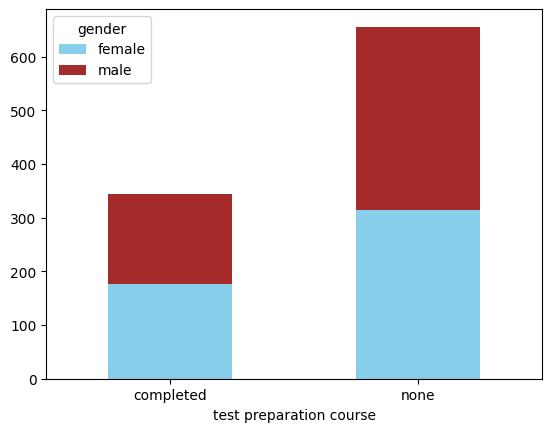

In [ ]:
#staked plot
df2 = (df.groupby("test preparation course")["gender"].value_counts().unstack())
df2.plot.bar(stacked = True, color = ['skyblue','brown'], rot=0)

<Axes: ylabel='test preparation course'>

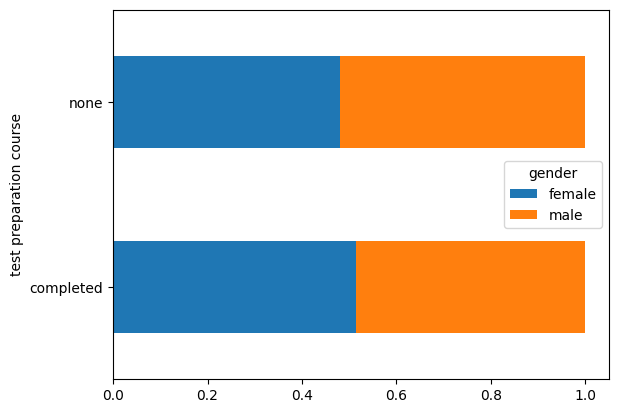

In [ ]:
#spinogram
gender_group = df.groupby(['test preparation course','gender']).size().unstack()
gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True)

Berdasarkan gruoup barplot dari variabel gender dan test preparation course diperoleh informasi bahwa siswa perempuan lebih banyak menyelesaikan kursus sebelum ujian dibandingkan siswa laki-laki.

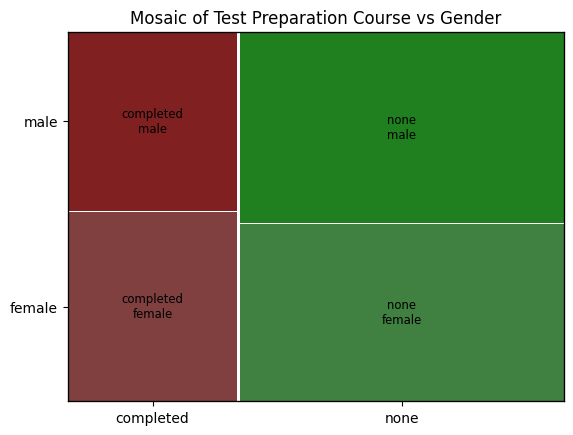

In [ ]:
mosaic(df, ['test preparation course', 'gender'], title='Mosaic of Test Preparation Course vs Gender')
plt.show()

3. Variabel parental level of education dan variabel test preparation course

In [ ]:
df.groupby('parental level of education')['test preparation course'].value_counts()

parental level of education  test preparation course
associate's degree           none                       132
                             completed                   72
bachelor's degree            none                        65
                             completed                   40
high school                  none                       143
                             completed                   72
master's degree              none                        54
                             completed                   21
some college                 none                       146
                             completed                   78
some high school             none                       116
                             completed                   61
Name: test preparation course, dtype: int64

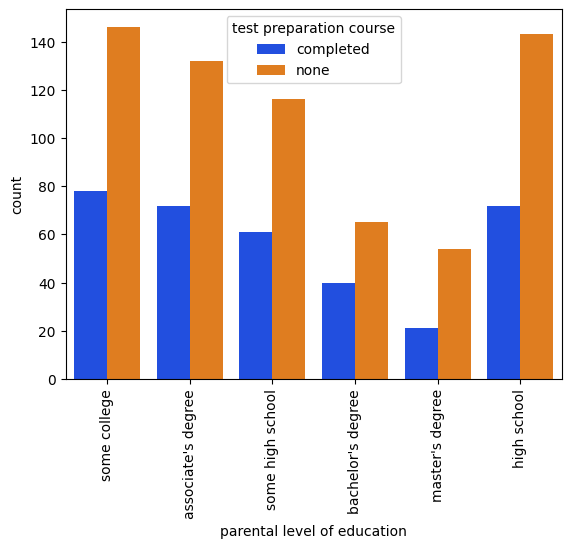

In [ ]:
groupbar = sns.countplot(x='parental level of education', data = df, hue='test preparation course', palette='bright')
groupbar1 = plt.setp(groupbar.get_xticklabels(), rotation=90)

4. Variabel parental level of education dan Lunch

In [ ]:
df.groupby('parental level of education')['lunch'].value_counts()

parental level of education  lunch       
associate's degree           standard        132
                             free/reduced     72
bachelor's degree            standard         68
                             free/reduced     37
high school                  standard        136
                             free/reduced     79
master's degree              standard         50
                             free/reduced     25
some college                 standard        150
                             free/reduced     74
some high school             standard        124
                             free/reduced     53
Name: lunch, dtype: int64

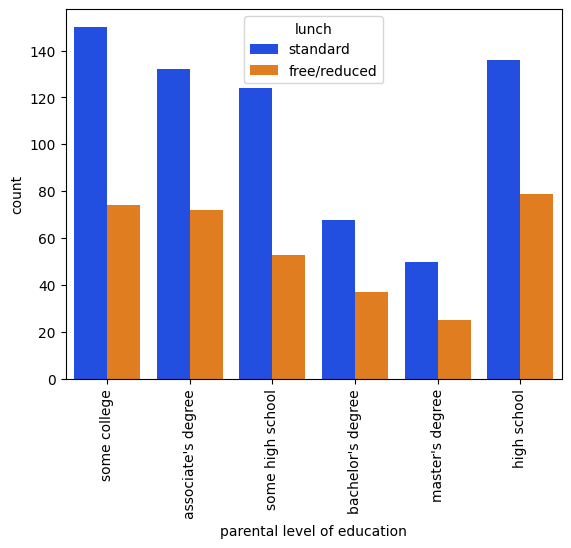

In [ ]:
groupbar = sns.countplot(x='parental level of education', data = df, hue='lunch', palette='bright')
groupbar1 = plt.setp(groupbar.get_xticklabels(), rotation=90)

Hubungan variabel gender dan lunch

In [ ]:
data_crosstab = pd.crosstab(df['gender'], df['lunch'],  margins = False)
data_crosstab

lunch,free/reduced,standard
gender,,
female,171,321
male,169,339


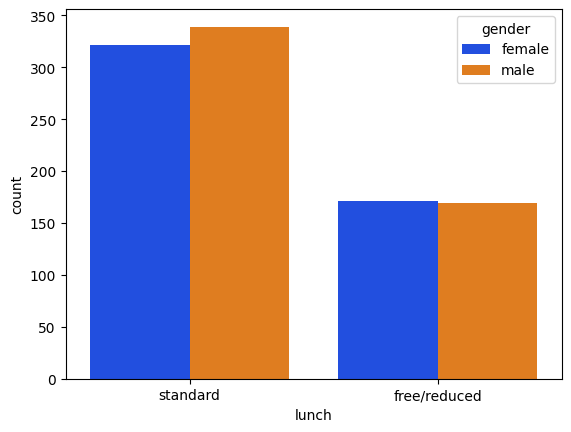

In [ ]:
groupbar = sns.countplot(x='lunch', data = df, hue='gender', palette='bright')
groupbar1 = plt.setp(groupbar.get_xticklabels(), rotation=0)

<Axes: xlabel='lunch'>

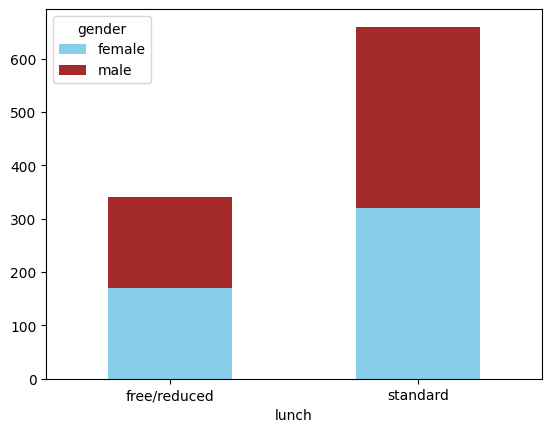

In [ ]:
#staked plot
df2 = (df.groupby("lunch")["gender"].value_counts().unstack())
df2.plot.bar(stacked = True, color = ['skyblue','brown'], rot=0)

<Axes: ylabel='lunch'>

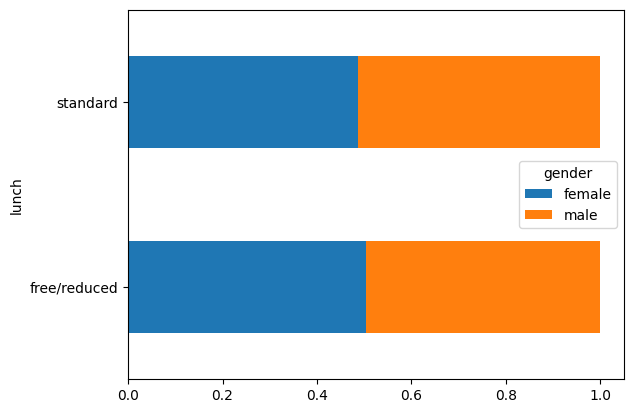

In [ ]:
#spinogram
gender_group = df.groupby(['lunch','gender']).size().unstack()
gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True)

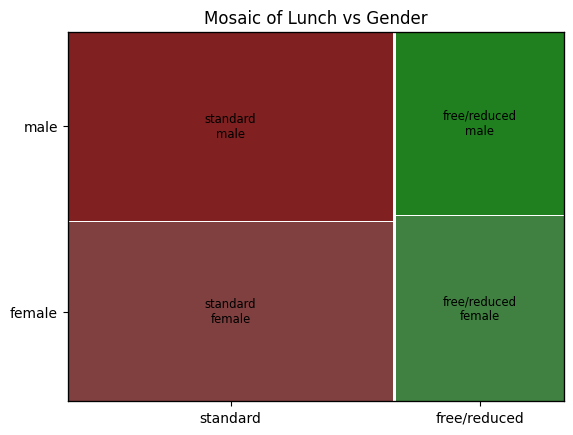

In [ ]:
mosaic(df, ['lunch', 'gender'], title='Mosaic of Lunch vs Gender')
plt.show()

3. Variabel parental level of education dan variabel test preparation course

In [ ]:
data_crosstab = pd.crosstab(df['parental level of education'], df['test preparation course'],  margins = False)
data_crosstab

test preparation course,completed,none
parental level of education,,
associate's degree,72,132
bachelor's degree,40,65
high school,72,143
master's degree,21,54
some college,78,146
some high school,61,116


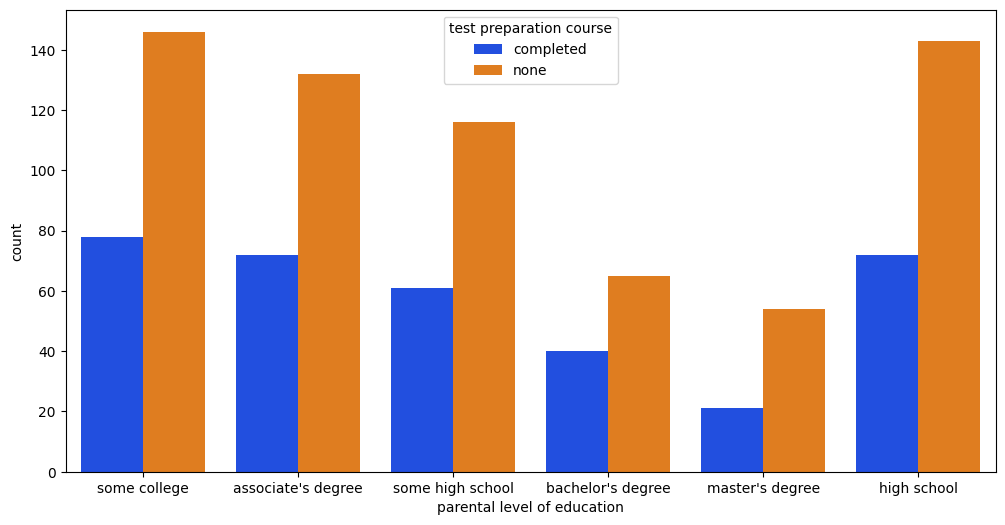

In [ ]:
plt.figure(figsize = (12,6))
groupbar = sns.countplot(x='parental level of education', data = df,
                         hue='test preparation course', palette='bright')
groupbar1 = plt.setp(groupbar.get_xticklabels(), rotation=0)

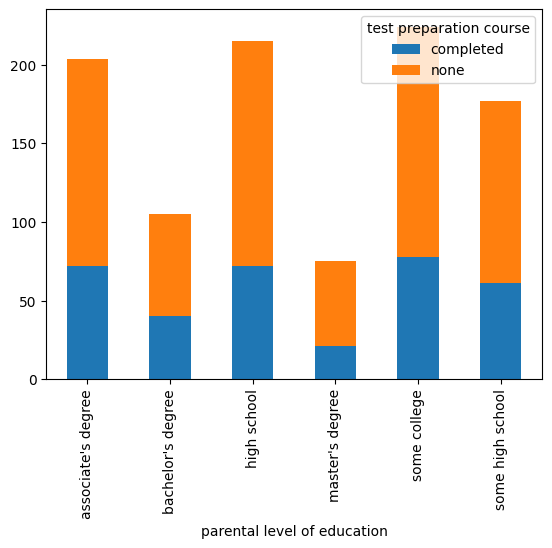

In [ ]:
df2 = (df.groupby('parental level of education')['test preparation course'].value_counts().unstack())
ax = df2.plot.bar(stacked=True)

<Axes: xlabel='parental level of education'>

<Figure size 1500x600 with 0 Axes>

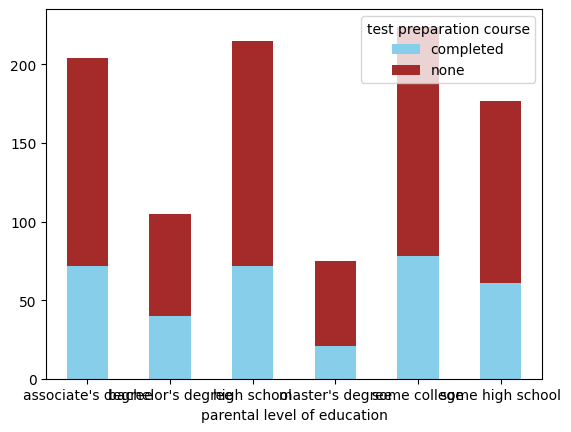

In [ ]:
#staked plot
plt.figure(figsize = (15,6))
df2 = (df.groupby('parental level of education')['test preparation course'].value_counts().unstack())
df2.plot.bar(stacked = True, color = ['skyblue','brown'], rot=0)

<Axes: ylabel='parental level of education'>

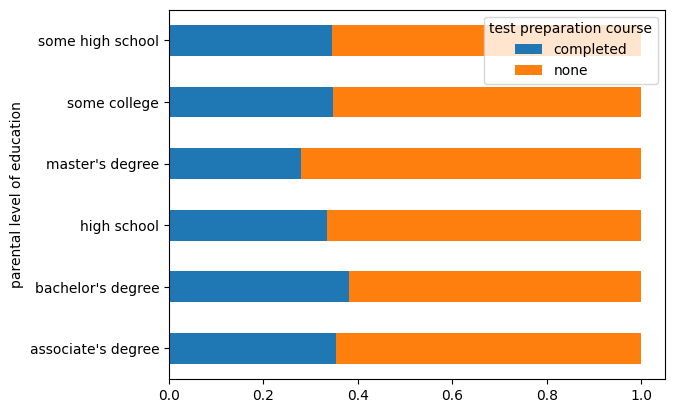

In [ ]:
#spinogram
gender_group = df.groupby(['parental level of education','test preparation course']).size().unstack()
gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True)

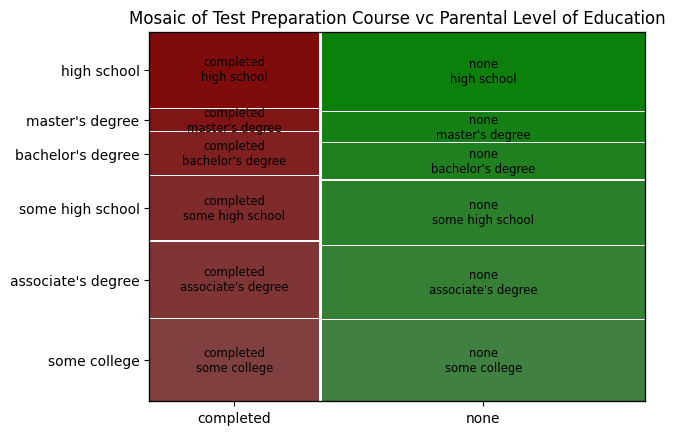

In [ ]:
mosaic(df, ['test preparation course','parental level of education'],
       title='Mosaic of Test Preparation Course vc Parental Level of Education')
plt.show()

In [ ]:
#aggregating
df['total score'] = (df['math score']+df['reading score']+df['writing score'])
#average
df['average'] = df['total score']/3

In [ ]:
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,some college,standard,completed,59,70,78,207,69.000000
1,male,associate's degree,standard,none,96,93,87,276,92.000000
2,female,some college,free/reduced,none,57,76,77,210,70.000000
3,male,some college,free/reduced,none,70,70,63,203,67.666667
4,female,associate's degree,standard,none,83,85,86,254,84.666667


<Axes: xlabel='average', ylabel='Count'>

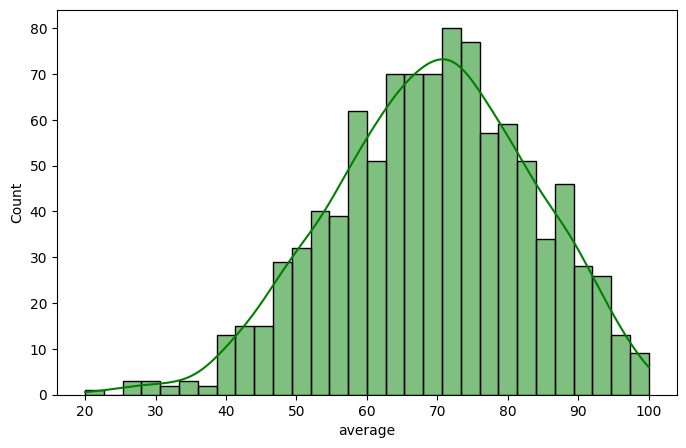

In [ ]:
fig,axis=plt.subplots(figsize=(8,5))
sns.histplot(data = df,x = 'average' , bins = 30 ,kde = True,color='g')


<Axes: xlabel='average', ylabel='Count'>

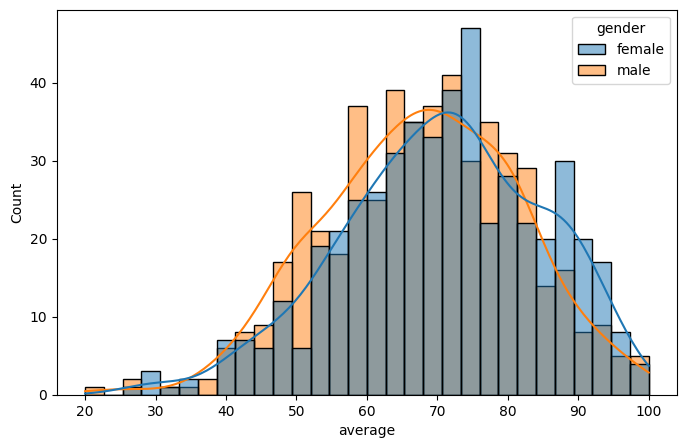

In [ ]:
fig,axis=plt.subplots(figsize=(8,5))
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')

<Axes: xlabel='average', ylabel='Count'>

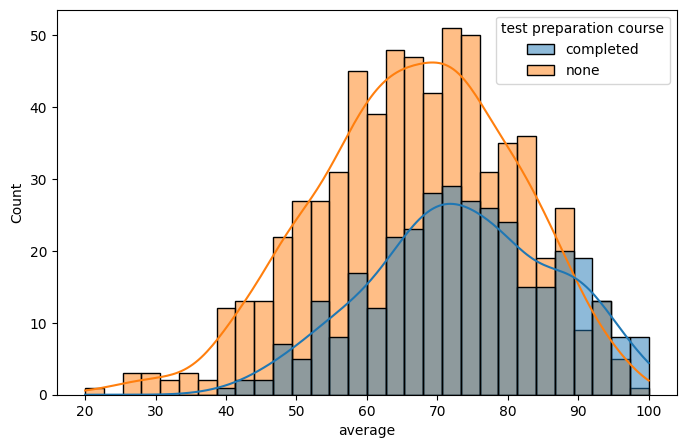

In [ ]:
fig,axis=plt.subplots(figsize=(8,5))
sns.histplot(data=df,x='average', bins=30, kde=True, hue='test preparation course')

<Axes: xlabel='average', ylabel='Count'>

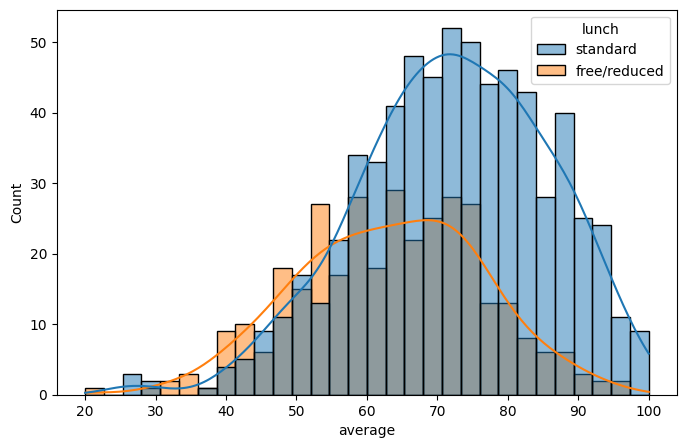

In [ ]:
fig,axis=plt.subplots(figsize=(8,5))
sns.histplot(data=df,x='average', bins=30, kde=True, hue='lunch')

<Axes: xlabel='gender', ylabel='average'>

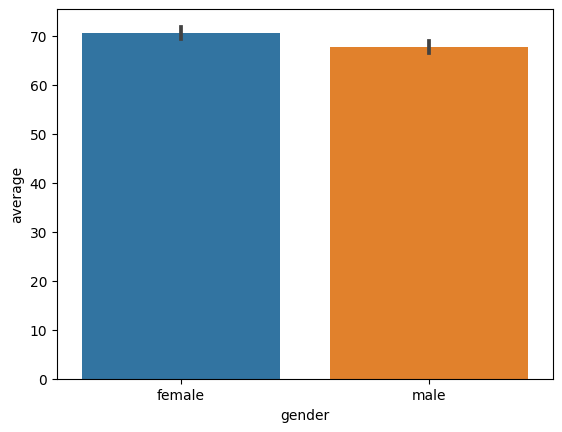

In [ ]:
sns.barplot(x = df['gender'], y = df['average'])

<Axes: xlabel='lunch', ylabel='average'>

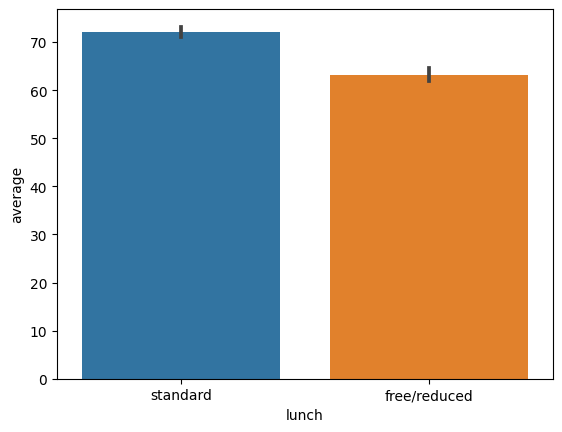

In [ ]:
sns.barplot(x = df['lunch'], y = df['average'])

<Axes: xlabel='test preparation course', ylabel='average'>

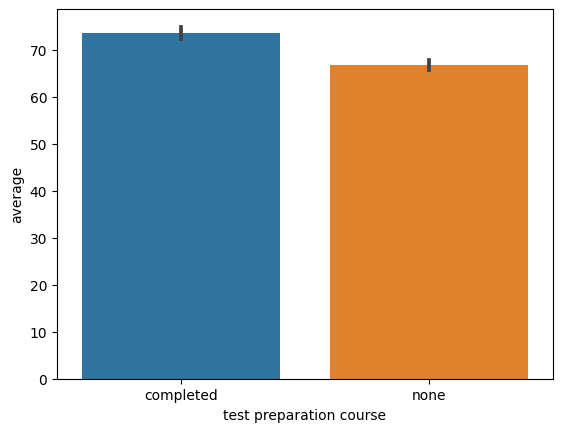

In [ ]:
sns.barplot(x = df['test preparation course'], y = df['average'])

<Axes: xlabel='parental level of education', ylabel='average'>

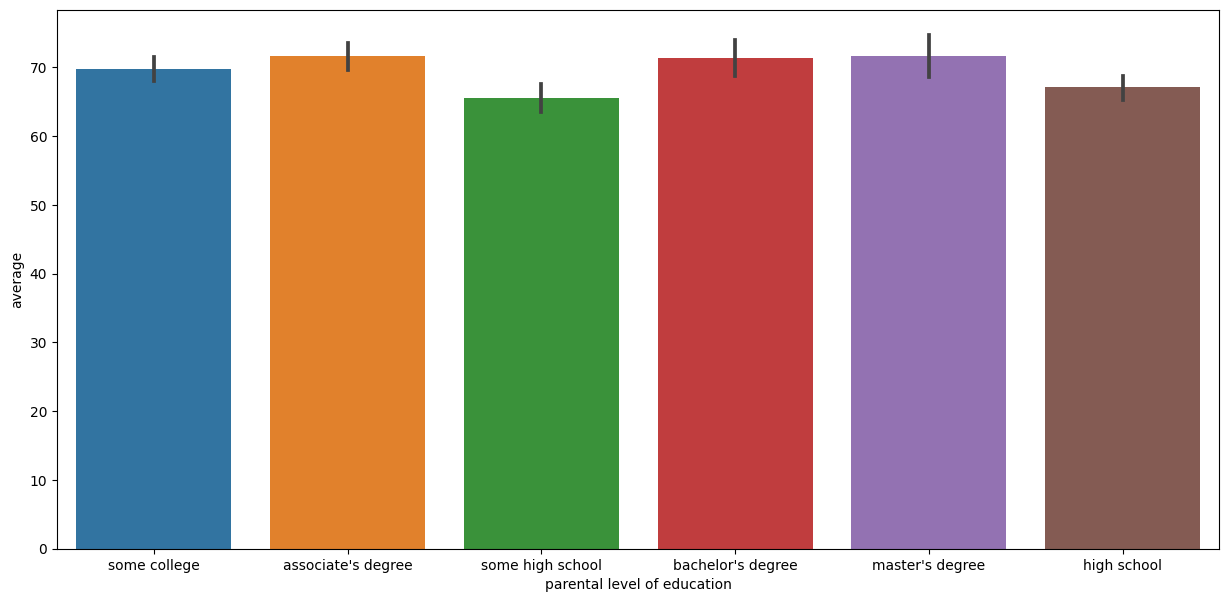

In [ ]:
plt.subplots(figsize=(15,7))
sns.barplot(x = df['parental level of education'], y = df['average'])

In [ ]:
#rata-rata nilai matematika berdasarkan jenis kelamin
df.groupby('gender', as_index=False)['math score'].mean()

,gender,math score
0,female,64.77439
1,male,70.75000


<Axes: title={'center': 'Barplot of Mean Math Score by Gender'}, xlabel='gender'>

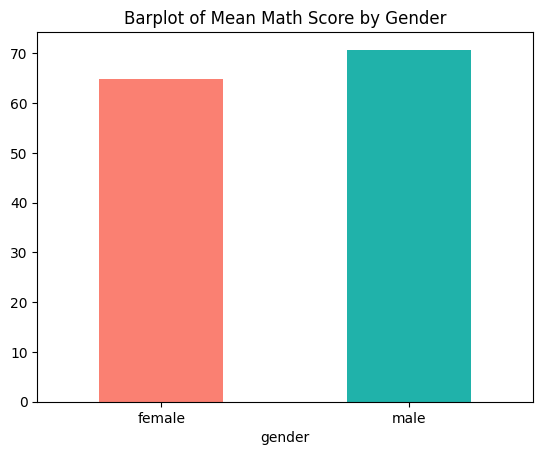

In [ ]:
df.groupby('gender')['math score'].mean().plot.bar(title='Barplot of Mean Math Score by Gender',
                                                   color=('salmon','lightseagreen'), rot=0)

In [ ]:
#rata-rata nilai reading berdasarkan jenis kelamin
df.groupby('gender', as_index=False)['reading score'].mean()

,gender,reading score
0,female,73.473577
1,male,67.387795


<Axes: title={'center': 'Barplot of Mean Reading Score by Gender'}, xlabel='gender'>

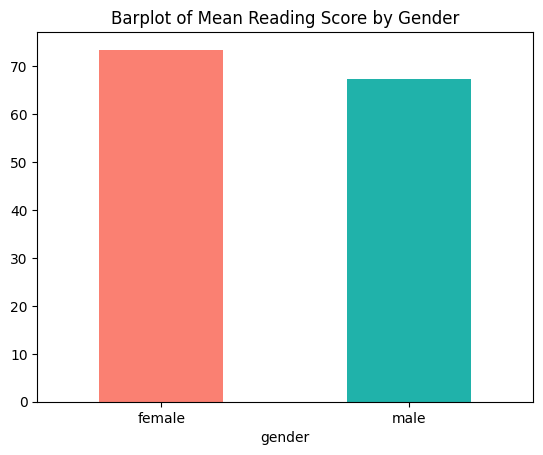

In [ ]:
df.groupby('gender')['reading score'].mean().plot.bar(title='Barplot of Mean Reading Score by Gender',
                                                      color=('salmon','lightseagreen'), rot=0)

In [ ]:
#rata-rata nilai writing berdasarkan jenis kelamin
df.groupby('gender', as_index=False)['writing score'].mean()

,gender,writing score
0,female,73.439024
1,male,64.976378


<Axes: title={'center': 'Barplot of Mean Writing Score by Gender'}, xlabel='gender'>

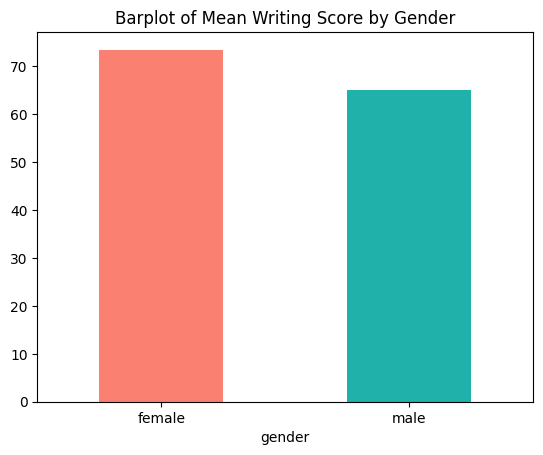

In [ ]:
df.groupby('gender')['writing score'].mean().plot.bar(title='Barplot of Mean Writing Score by Gender',
                                                      color=('salmon','lightseagreen'), rot=0)